In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
from copy import deepcopy as copy

In [2]:
from IPython.display import Latex
from IPython.display import Math

In [3]:
df_dataset=pd.read_csv("adult.csv")
names = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum','maritalStatus','occupation','relationship','race','sex','capitalGain','capitalLoss','hoursPerWeek','nativeCountry','Output']

In [4]:
df_dataset.shape

(32561, 15)

In [5]:
df_dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
df_dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df_dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
df_dataset = df_dataset.dropna(how='any') 
#dropna() method allows the user to analyze and drop Rows/Columns with Null values in different ways.
df_dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [9]:
df_dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df_dataset.rename(columns={'Output': 'income'}, inplace=True)
df_dataset.head(0)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [11]:
 df_dataset = df_dataset[(df_dataset.workclass != ' ?' ) & (df_dataset.education != ' ?') & (df_dataset.occupation != ' ?') & (df_dataset.relationship != ' ?') & (df_dataset.race != ' ?') & (df_dataset.sex != ' ?')]

In [12]:
df_dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [13]:
df_dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [14]:
df_dataset["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [15]:
df_dataset.head(0)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [16]:
df_dataset.shape

(32561, 15)

In [17]:
df_dataset['income'].unique

<bound method Series.unique of 0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object>

In [18]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [19]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [20]:
df_dataset['workclass'] = le.fit_transform(df_dataset['workclass'])
df_dataset['education'] = le.fit_transform(df_dataset['education'])
df_dataset['marital.status'] = le.fit_transform(df_dataset['marital.status'])
df_dataset['occupation'] = le.fit_transform(df_dataset['occupation'])
df_dataset['relationship'] = le.fit_transform(df_dataset['relationship'])
df_dataset['race'] = le.fit_transform(df_dataset['race'])
df_dataset['sex'] = le.fit_transform(df_dataset['sex'])
df_dataset['native.country'] = le.fit_transform(df_dataset['native.country'])
df_dataset['income'] = le.fit_transform(df_dataset['income'])

In [21]:
df_dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [22]:
df_dataset['native.country'].unique()

array([39,  0, 26, 12, 40,  3, 36, 19, 30, 38,  2, 35, 15, 33, 31, 20,  9,
       11, 22, 24, 17, 16,  5, 21,  1, 29, 27,  6, 14,  8, 18,  4, 13, 23,
        7, 10, 41, 34, 32, 25, 37, 28])

In [23]:
import seaborn as sns

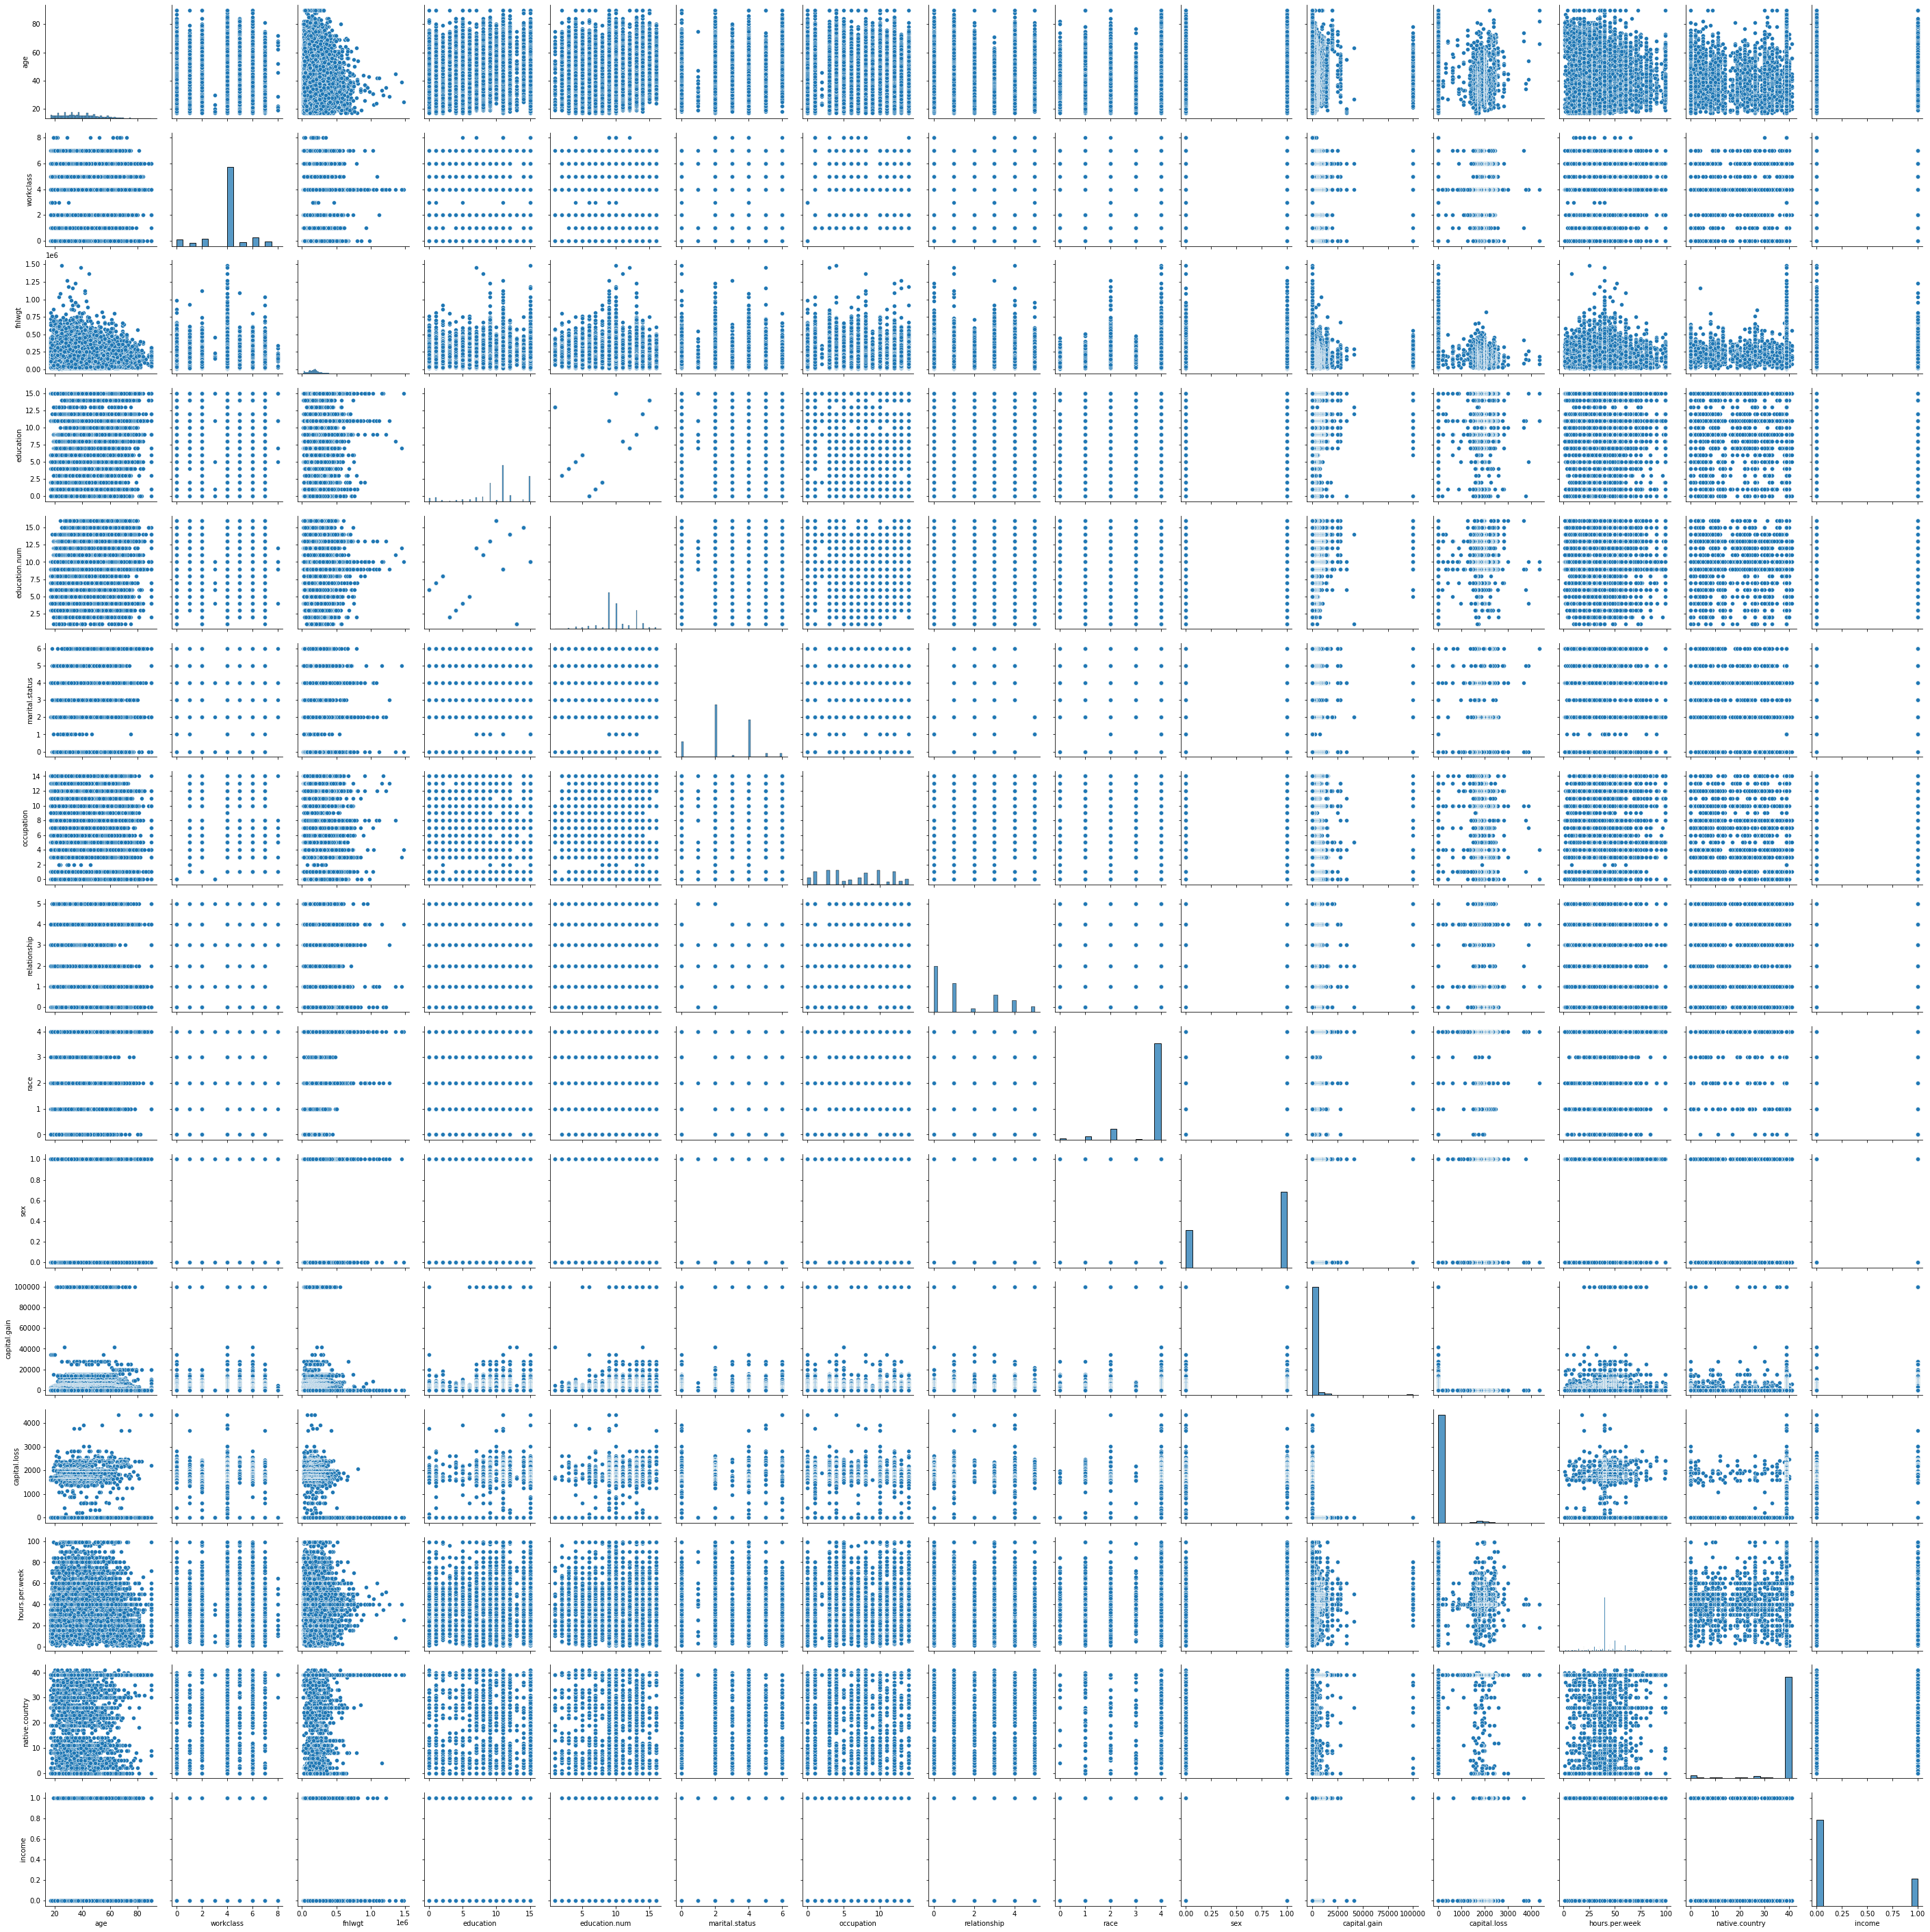

In [24]:
g = sns.pairplot(df_dataset)
g.fig.set_size_inches(40,40)

<Figure size 1440x720 with 0 Axes>

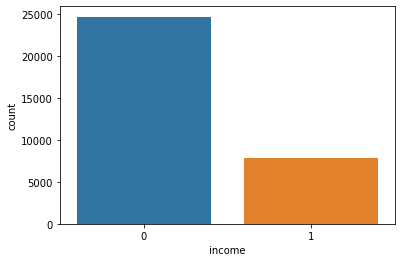

<Figure size 1440x720 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
sns.countplot(x="income", data=df_dataset)
plt.figure(figsize=(20,10))

In [26]:
df_dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0


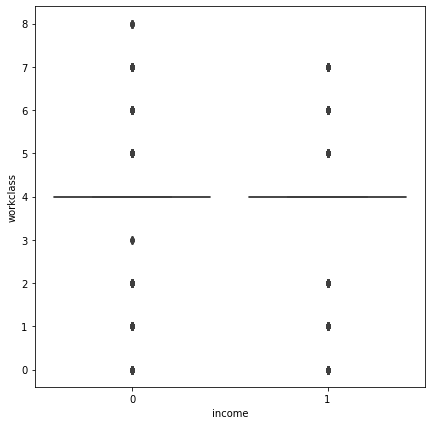

In [27]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="workclass",x='income', data=df_dataset)

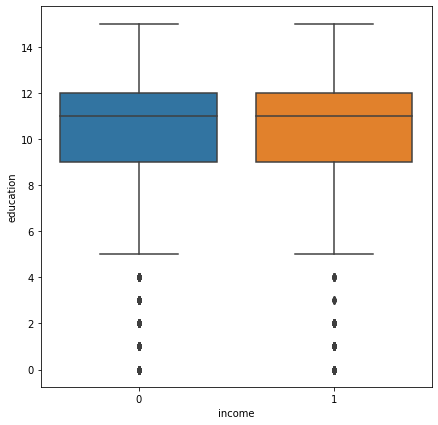

In [28]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="education",x='income', data=df_dataset)

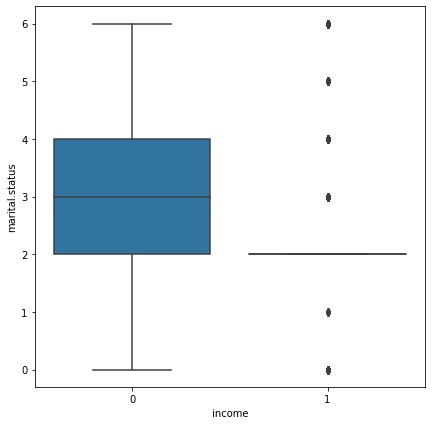

In [29]:
plt.figure(figsize=(7, 7))
ax = sns.boxplot(y="marital.status",x='income', data=df_dataset)

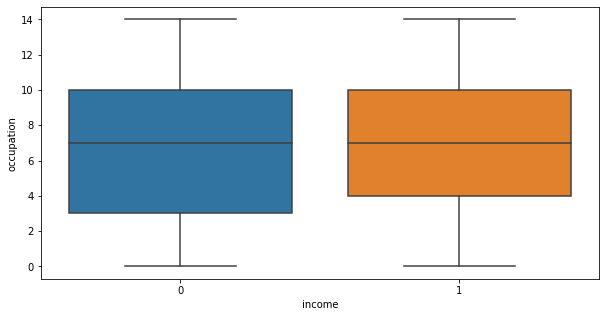

In [30]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="occupation",x='income', data=df_dataset)

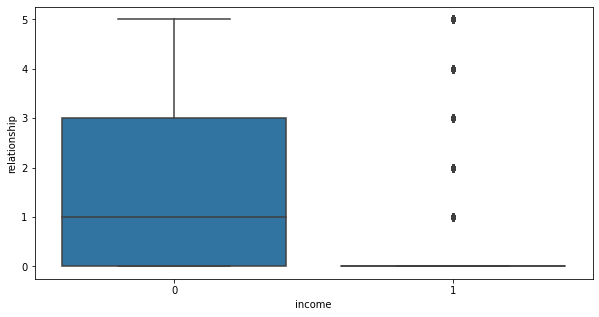

In [31]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="relationship",x='income', data=df_dataset)

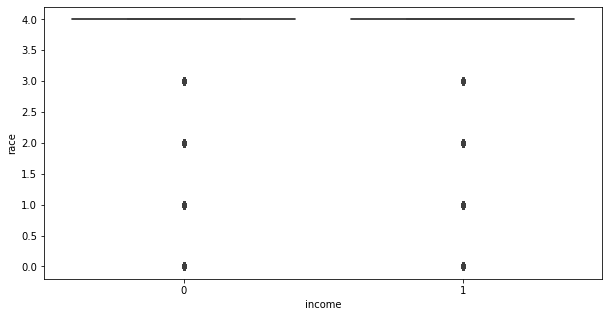

In [32]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="race",x='income', data=df_dataset)

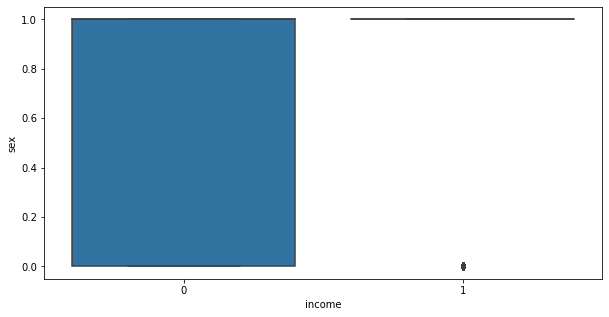

In [33]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="sex",x='income', data=df_dataset)

In [34]:
df_dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14')]

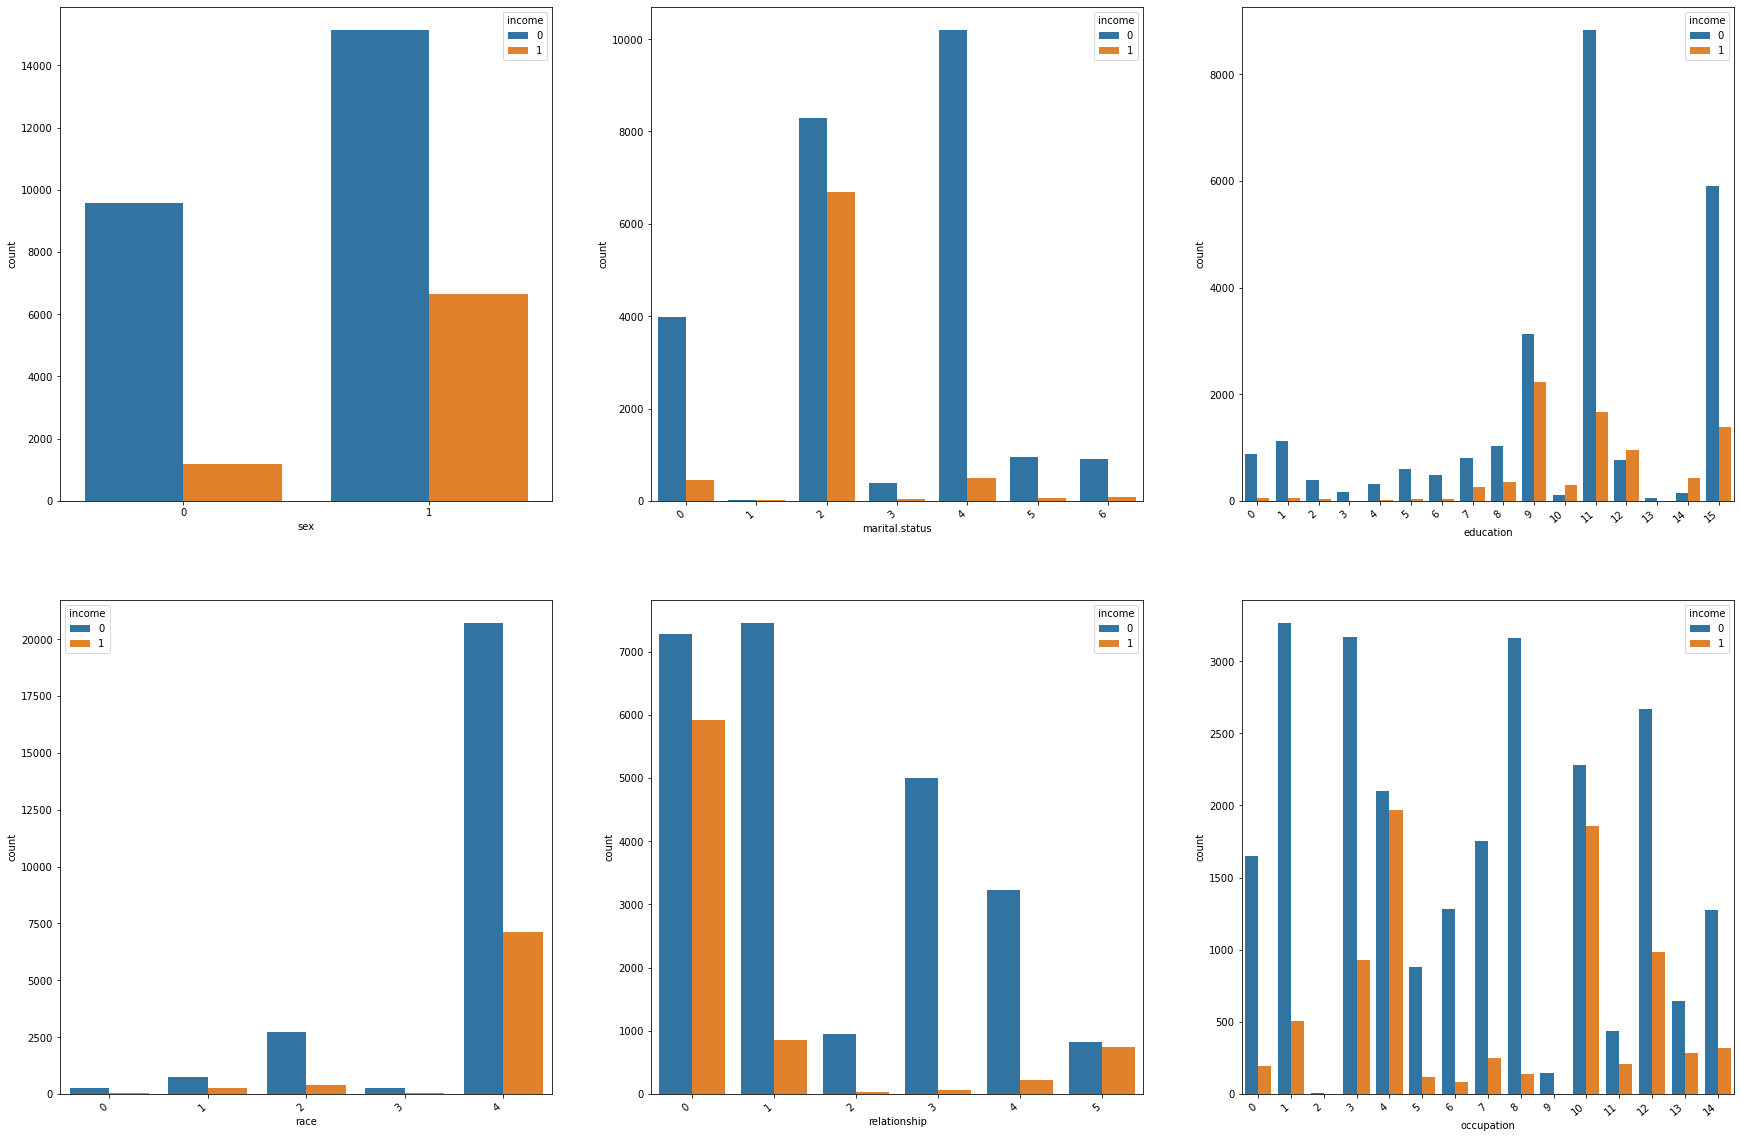

In [35]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(30,20))
sns.countplot(x="sex", data=df_dataset,hue="income",ax = ax[0][0])
cp = sns.countplot(x="marital.status", data=df_dataset,hue="income",ax = ax[0][1])
cp.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp2 = sns.countplot(x="education", data=df_dataset,hue="income",ax = ax[0][2])
cp2.set_xticklabels(cp2.get_xticklabels(), rotation=40, ha="right")
cp3 = sns.countplot(x="race", data=df_dataset,hue="income",ax = ax[1][0])
cp3.set_xticklabels(cp3.get_xticklabels(), rotation=40, ha="right")
cp4 = sns.countplot(x="relationship", data=df_dataset,hue="income", ax = ax[1][1])
cp4.set_xticklabels(cp4.get_xticklabels(), rotation=40, ha="right")
cp5 = sns.countplot(x="occupation", data=df_dataset,hue="income",ax= ax[1][2])
cp5.set_xticklabels(cp5.get_xticklabels(), rotation=40, ha="right")


age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
workclass          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
fnlwgt             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
education          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
marital.status       AxesSubplot(0.125,0.518913;0.168478x0.16413)
occupation        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
relationship      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
race              AxesSubplot(0.731522,0.518913;0.168478x0.16413)
sex                  AxesSubplot(0.125,0.321957;0.168478x0.16413)
capital.gain      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
capital.loss      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
hours.per.week    AxesSubplot(0.731522,0.321957;0.168478x0.16413)
native.country          AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

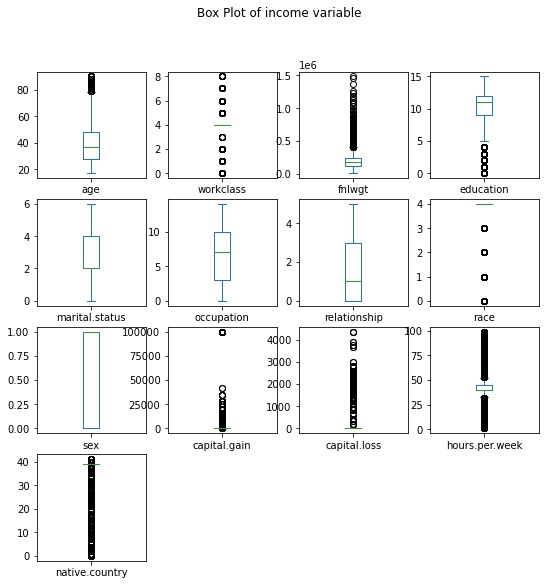

In [36]:
df_dataset.drop(['education.num','income'],axis = 1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        figsize=(9,9),title='Box Plot of income variable')

<AxesSubplot:xlabel='age', ylabel='Count'>

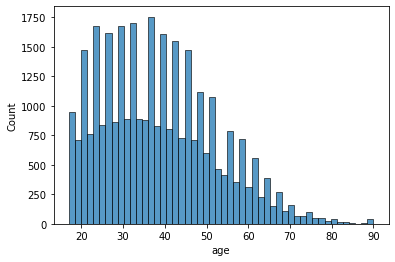

In [37]:
sns.histplot(df_dataset['age'],kde = False,bins = 50)
##Histograms represent the data distribution by forming bins along the range of the data and then drawing bars to 
##show the number of observations that fall in each bin.

<AxesSubplot:xlabel='education.num', ylabel='Count'>

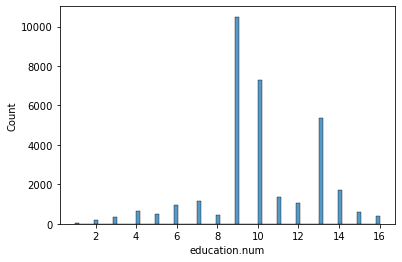

In [38]:
sns.histplot(df_dataset['education.num'],kde = False)

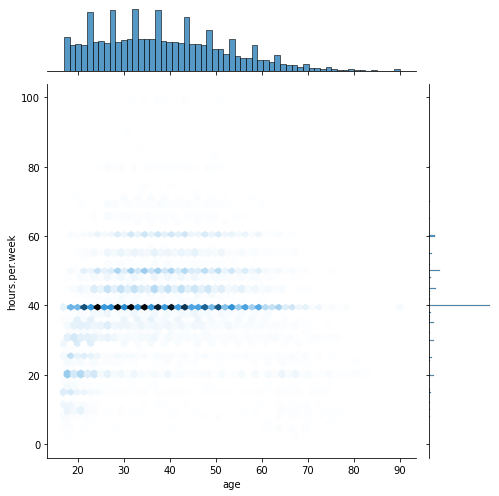

In [39]:
sns.jointplot(x ="age", y="hours.per.week", data=df_dataset,kind="hex",height = 7)
#basicaly jointplot()is Draw a plot of two variables with bivariate and univariate graphs.

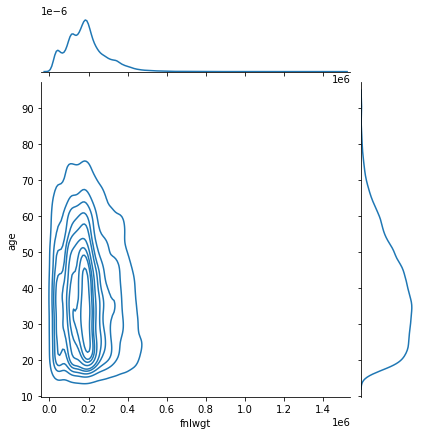

In [40]:
sns.jointplot(x="fnlwgt", y="age", data=df_dataset, kind="kde")

<AxesSubplot:>

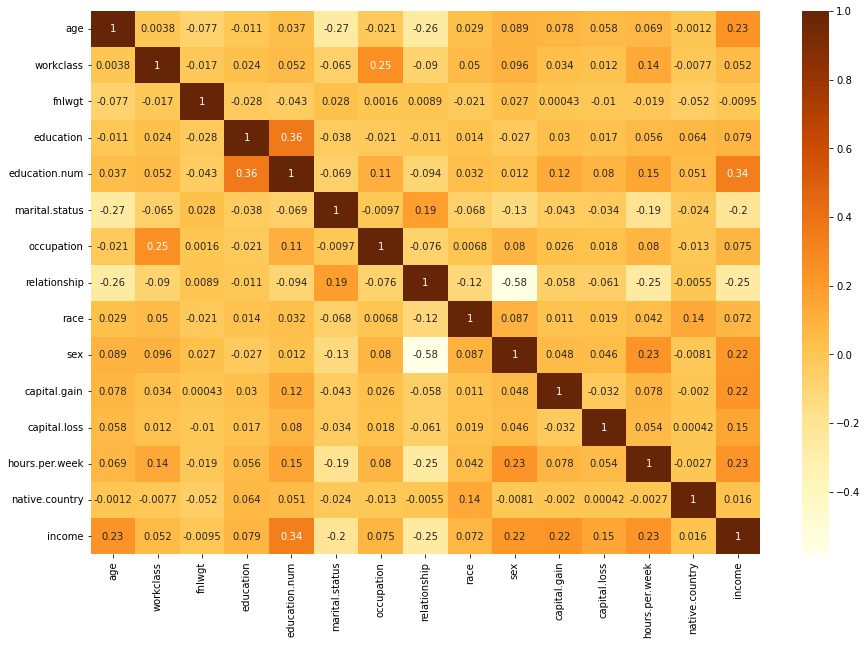

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df_dataset.corr(),annot=True,cmap = 'YlOrBr')
#heatmap is a plot of rectangular data as a color-encoded matrix

In [42]:
df_dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0


In [43]:
df1 = df_dataset.drop(['fnlwgt','education', 'capital.loss','native.country'],axis=1)
df1

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,hours.per.week,income
0,90,0,9,6,0,1,4,0,0,40,0
1,82,4,9,6,4,1,4,0,0,18,0
2,66,0,10,6,0,4,2,0,0,40,0
3,54,4,4,0,7,4,4,0,0,40,0
4,41,4,10,5,10,3,4,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,10,4,11,1,4,1,0,40,0
32557,27,4,12,2,13,5,4,0,0,38,0
32558,40,4,9,2,7,0,4,1,0,40,1
32559,58,4,9,6,1,4,4,0,0,40,0


In [44]:
df_dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0


<AxesSubplot:>

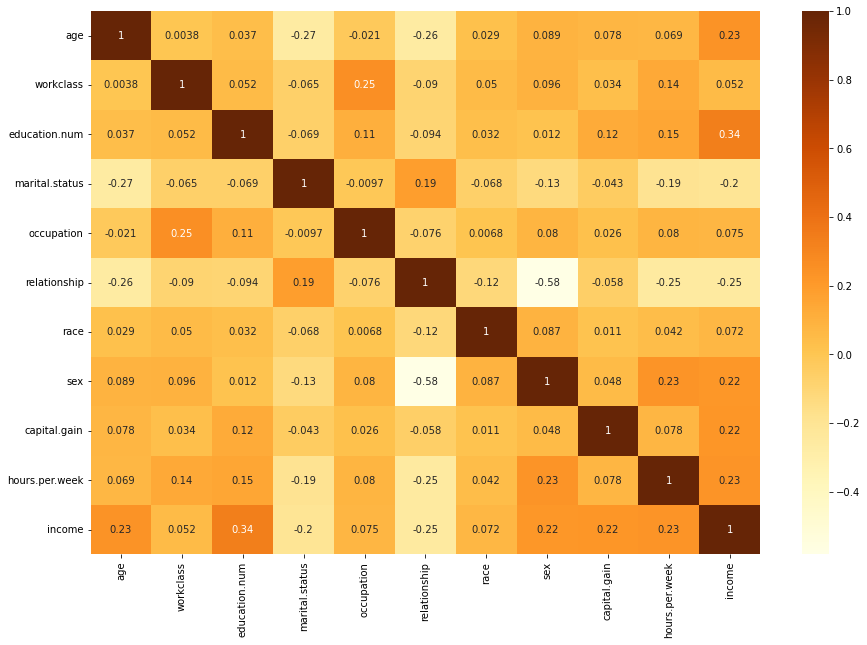

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap = 'YlOrBr')

In [46]:
df1

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,hours.per.week,income
0,90,0,9,6,0,1,4,0,0,40,0
1,82,4,9,6,4,1,4,0,0,18,0
2,66,0,10,6,0,4,2,0,0,40,0
3,54,4,4,0,7,4,4,0,0,40,0
4,41,4,10,5,10,3,4,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,10,4,11,1,4,1,0,40,0
32557,27,4,12,2,13,5,4,0,0,38,0
32558,40,4,9,2,7,0,4,1,0,40,1
32559,58,4,9,6,1,4,4,0,0,40,0


In [47]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [48]:
Y = df1['income']
df1['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [49]:
X = df1.drop(['income'],axis=1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=40)

In [52]:
X_train.shape

(22792, 10)

In [53]:
X_test.shape

(9769, 10)

In [54]:
Y_test.shape

(9769,)

In [55]:
Y_train.shape

(22792,)

In [56]:
Y_test= np.array(Y_test).reshape(-1,1)
Y_test.shape

(9769, 1)

In [57]:
Y_train= np.array(Y_train).reshape(-1,1)
Y_train.shape

(22792, 1)

In [58]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [61]:
from keras.layers import InputLayer

In [62]:
# Neural network
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [64]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=500)

Epoch 1/10
46/46 [==============================] - 2s 5ms/step - loss: 8.3999 - accuracy: 0.3396
Epoch 2/10
46/46 [==============================] - 0s 5ms/step - loss: 4.4476 - accuracy: 0.4126
Epoch 3/10
46/46 [==============================] - 0s 5ms/step - loss: 2.7378 - accuracy: 0.5362
Epoch 4/10
46/46 [==============================] - 0s 5ms/step - loss: 2.0657 - accuracy: 0.6801
Epoch 5/10
46/46 [==============================] - 0s 5ms/step - loss: 1.6342 - accuracy: 0.7146
Epoch 6/10
46/46 [==============================] - 0s 5ms/step - loss: 1.1312 - accuracy: 0.7403
Epoch 7/10
46/46 [==============================] - 0s 5ms/step - loss: 1.1483 - accuracy: 0.7502
Epoch 8/10
46/46 [==============================] - 0s 5ms/step - loss: 0.9052 - accuracy: 0.7548
Epoch 9/10
46/46 [==============================] - 0s 5ms/step - loss: 0.7959 - accuracy: 0.7641
Epoch 10/10
46/46 [==============================] - 0s 5ms/step - loss: 0.7734 - accuracy: 0.7690


In [65]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.30)

306/306 [==============================] - 1s 2ms/step


In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [67]:
cm

array([[6245, 1161],
       [1350, 1013]], dtype=int64)

In [68]:
from sklearn.metrics import f1_score

In [69]:
f1_score(Y_test, y_pred)

0.44655058408640075

In [70]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [71]:
precision_score(Y_test, y_pred)

0.4659613615455382

In [72]:
recall_score(Y_test, y_pred)

0.4286923402454507

In [73]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
# Neural network
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [74]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=500)

Epoch 1/10
46/46 [==============================] - 2s 4ms/step - loss: 87.3447 - accuracy: 0.2400
Epoch 2/10
46/46 [==============================] - 0s 3ms/step - loss: 26.8550 - accuracy: 0.2872
Epoch 3/10
46/46 [==============================] - 0s 4ms/step - loss: 19.1034 - accuracy: 0.4811
Epoch 4/10
46/46 [==============================] - 0s 3ms/step - loss: 18.6110 - accuracy: 0.6675
Epoch 5/10
46/46 [==============================] - 0s 3ms/step - loss: 17.2692 - accuracy: 0.6888
Epoch 6/10
46/46 [==============================] - 0s 4ms/step - loss: 14.9152 - accuracy: 0.6907
Epoch 7/10
46/46 [==============================] - 0s 4ms/step - loss: 16.3399 - accuracy: 0.6959
Epoch 8/10
46/46 [==============================] - 0s 4ms/step - loss: 16.5168 - accuracy: 0.7011
Epoch 9/10
46/46 [==============================] - 0s 4ms/step - loss: 15.0701 - accuracy: 0.7141
Epoch 10/10
46/46 [==============================] - 0s 3ms/step - loss: 13.0599 - accuracy: 0.7187


In [76]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.30)

306/306 [==============================] - 1s 2ms/step


In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [78]:
cm

array([[5152, 2254],
       [1144, 1219]], dtype=int64)

In [79]:
from sklearn.metrics import f1_score

In [80]:
f1_score(Y_test, y_pred)

0.4177518848526388

In [81]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [82]:
precision_score(Y_test, y_pred)

0.3509933774834437

In [ ]:
recall_score(Y_test, y_pred)